**차원과 차원 축소**

**PCA 클래스**

In [18]:
import numpy as np

fruits = np.load('C:/prac/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [19]:
# 사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공
# PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 함

from sklearn.decomposition import PCA

pca = PCA(n_components= 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [20]:
# PCA 클래스가 찾은 주성분은 components_ 속성에 저장

print(pca.components_.shape)

(50, 10000)


In [21]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio= 1):
    n = len(arr)    # n : 샘플 개수
    
    # gks wnfdp 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    
    # 행이 1개이면 열의 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, figsize= (cols*ratio, rows*ratio), squeeze= False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그림
                axs[i,j].imshow(arr[i*10 + j], cmap= 'gray_r')
            axs[i,j].axis('off')
    plt.show()

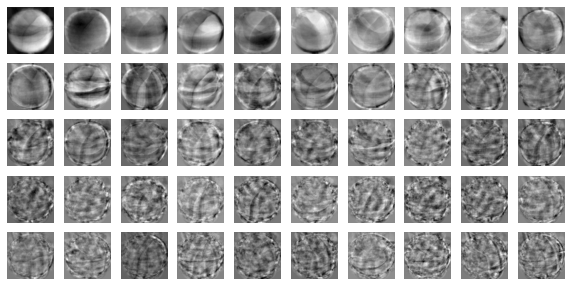

In [22]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [23]:
# 원본 데이터를 주성분에 투영하여 특성의 개수 10,000개에서 50개로 축소
# PCA의 transform() 메서드를 이용해 특성의 개수를 축소

print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


**원본 데이터 재구성**

In [24]:
# PCA 클래스의 inverse_transform() 메서드를 이용해 축소한 특성을 다시 원본으로 복구

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


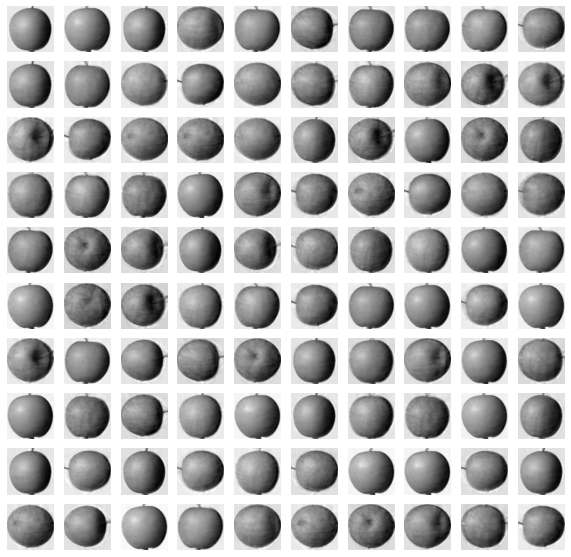

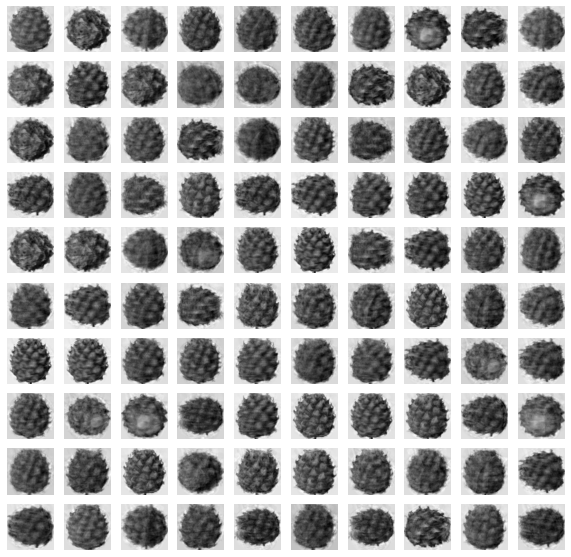

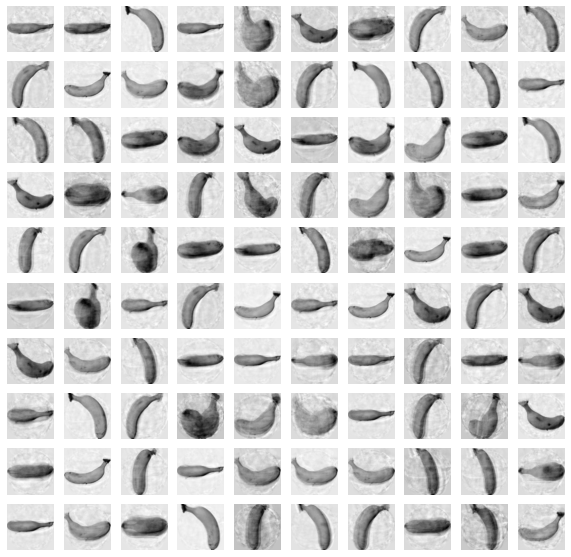

In [25]:
# 복구된 데이터를 100x100 크기로 바꾸어 100개씩 나누어 출력

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start: start +100])
    print("\n")

**설명된 분산**

In [26]:
# PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록
# 첫 번쨰 주성분의 설명된 분산이 가장 큼
# 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 획득 가능

print(np.sum(pca.explained_variance_ratio_))

0.9215367846314868


In [27]:
# 92%가 넘은 분산을 유지
# 50개의 특성에서 원본으로 복원했을 때 원본 이미지의 품질이 높았던 이유 ==> 높은 분산 합


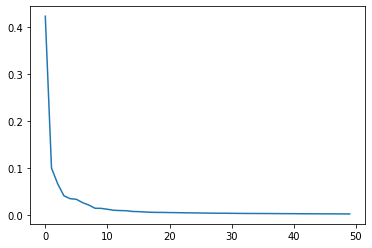

In [28]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 처음 10개의 주성분이 대부분의 분산을 표현

In [29]:
# PCA로 차원 축소된 데이터를 사용하여 지도학습 모델을 훈련

# 3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# 지도 학습 모델 사용을 위해 타깃값 생성
# 사과 0, 파인애플 1, 바나나 2
# 파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복 ==> 100개의 0, 100개의 1, 100개의 2로 이루어진 타깃 데이터 생성

target = np.array([0]*100 + [1]*100 + [2]*100)

In [30]:
# 원본 데이터 fruits_2d를 사용
# 로지스틱 회귀 모델에서 성능 검증을 위해 cross_validation()로 교차 검증 수행

from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 교차 검증의 점수 0.997로 매우 높음
# 특성이 10,000개 이므로 300개의 샘플에서는 과적합된 모델
# cross_validation() 메서드가 반환하는 딕셔너리에는 fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록

0.9966666666666667
0.5854150772094726


In [35]:
# PCA로 축소한 fruits_pca와 비교

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.015202188491821289


In [37]:
# 원하는 설명된 분산의 비율 입력 가능
# PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾음
# 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 생성

pca = PCA(n_components= 0.5)
# n_components에 0~1 사이의 비율을 실수로 입력하면 지정된 비율에 도달하는 주성분을 찾음

pca.fit(fruits_2d)

PCA(n_components=0.5)

In [40]:
print(pca.n_components_)

# 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다.

2


In [41]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [42]:
# 2개의 특성만 사용하여 교차 검증

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.019936275482177735


C:\Users\jwhyu\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jwhyu\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

**차원 축소된 데이터를 사용해 k-평균 알고리즘 클러스터 찾기**

In [44]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters= 3, random_state= 42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts= True))

# fruits_pca로 찾은 클러스터는 각각 110, 99, 91개의 샘플 포함

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


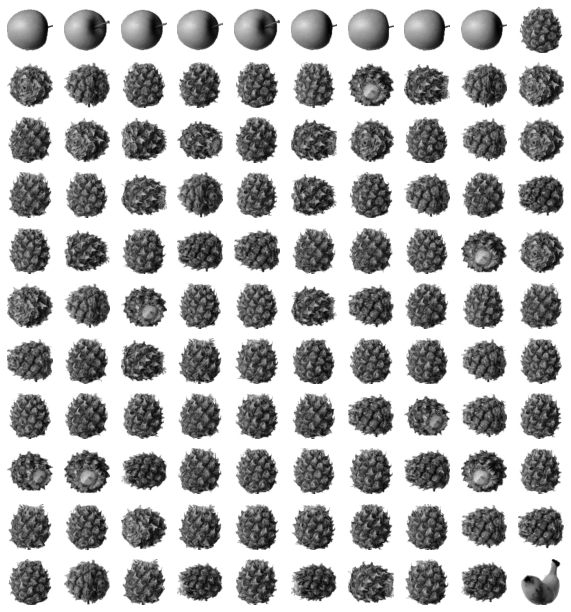

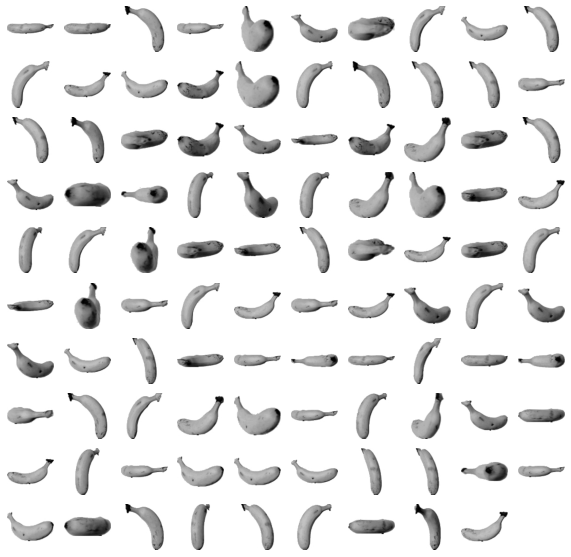

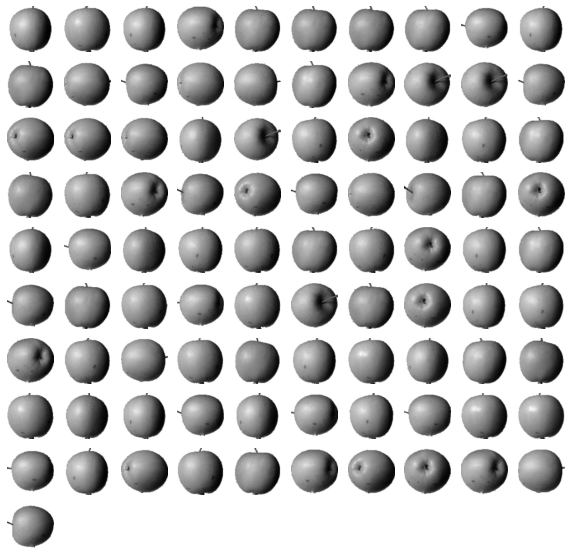

In [47]:
# KMeans가 찾은 레이블을 사용해 과일 이미지 출력

for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print("\n")

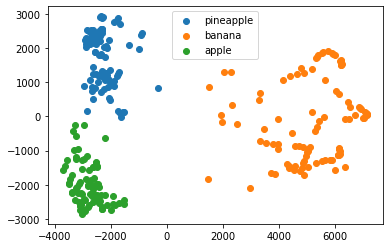

In [48]:
# fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현 가능
# km.labels_를 사용해 클러스터별 산점도 출력

for label in range(0, 3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()